In [6]:
import numpy as np
import matplotlib.pyplot as plt

In this notebook we demonstrate principal components analysis (PCA). First we will perform PCA by hand by computing eigenvalues and eigenvectors of the data covariance matrix; then we will show how to obtain the same results using the `sklearn` library.

(-4.0, 4.0)

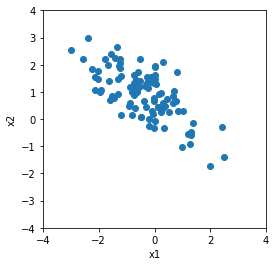

In [7]:
# Make up some two-dimensional data
n = 100
mu = np.array([-0.5, 1.])
sig = np.array([[1, -0.6], [-0.6, 0.8]])
x = np.random.multivariate_normal(mu, sig, n)

# Plot the data
plt.figure(figsize=(4,4))
plt.plot(x[:,0], x[:,1], 'o')
plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim(-4,4)
plt.ylim(-4,4)

First we'll do PCA by hand by computing the eigendecomposition of the covariance matrix.

**Exercise**: Compute the covariance matrix from the data above, and show that it is similar to the covariance matrix that was used to generate the data. Compute the eigenvalues of the data covariance matrix. What is the fraction of the total variance accounted for by the first principal component?

In [8]:
## Solution ##

# Compute the data covariance matrix:
data_cov = np.cov(x.T)

# Show that it is close to the covariance matrix used to generate the data:
print('Data covariance: \n', data_cov)
print('Model covariance: \n', sig)

# Get the evals and evecs (columns of evecs are eigenvectors):
evals, evecs = np.linalg.eig(data_cov)

# Note that NumPy automatically orders them according to eigenvalue magnitude:
print('Eigenvalues: ', evals)
print('Fraction of variance accounted for by 1st PC: ', evals[0]/np.sum(evals))

Data covariance: 
 [[ 1.12052527 -0.64751948]
 [-0.64751948  0.80423148]]
Model covariance: 
 [[ 1.  -0.6]
 [-0.6  0.8]]
Eigenvalues:  [1.62893063 0.29582611]
Fraction of variance accounted for by 1st PC:  0.8463046761848645


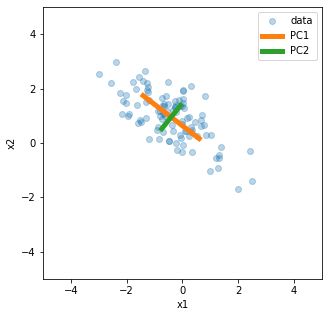

In [9]:
# Plot the data together with the PCs scaled by the sqrt(variance) and centered with the data.

# The mean of the data:
x_mean = np.mean(x, axis=0)

# Get the PC vectors and scaling factors, using evals and evecs computed above:
[u1, u2] = evecs.T
std1 = evals[0]**0.5
std2 = evals[1]**0.5

# Plot the data:
plt.figure(figsize=(5,5))
plt.plot(x[:,0], x[:,1], 'o', alpha=0.3)

# Plot a line showing the first PC scaled by the sqrt(variance):
plt.plot([x_mean[0] - std1*u1[0], x_mean[0] + std1*u1[0]], 
         [x_mean[1] - std1*u1[1], x_mean[1] + std1*u1[1]], lw=5)

# Plot a line showing the second PC scaled by the sqrt(variance):
plt.plot([x_mean[0] - std2*u2[0], x_mean[0] + std2*u2[0]], 
         [x_mean[1] - std2*u2[1], x_mean[1] + std2*u2[1]], lw=5)

plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.legend(['data','PC1','PC2'])

**Exercise**: Subtract the mean from the data and plot the data projected onto the two PC axes.

(-5.0, 5.0)

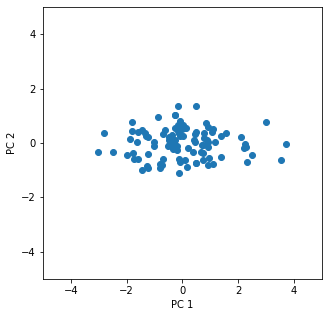

In [10]:
## Solution ##

# Project the data onto the principal component axes. Typically we subtract off the mean first:
x_meansub = x - x_mean
proj = x_meansub @ evecs  # x_meansub is N-by-2; evecs is 2-by-2 (where columns are PCs)

# Plot the data projected along the first two PCs:
plt.figure(figsize=(5,5))
plt.plot(proj[:,0], proj[:,1], 'o')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.xlim(-5,5)
plt.ylim(-5,5)

## PCA using sk-learn

Now we'll do PCA on the above data using `sklearn`.

In [11]:
from sklearn.decomposition import PCA

# Perform PCA on the data:
pca = PCA()
pca.fit(x)
PCs = pca.components_  # each row is one of the PC vectors
print(PCs)

# How much variance is explained by each PC?
print('Variance explained by (PC1, PC2): ', pca.explained_variance_)
print('Fraction of variance explained by (PC1, PC2): ', pca.explained_variance_ratio_)

[[ 0.78653069 -0.61755119]
 [ 0.61755119  0.78653069]]
Variance explained by (PC1, PC2):  [1.62893063 0.29582611]
Fraction of variance explained by (PC1, PC2):  [0.84630468 0.15369532]


**Exercise**: (a) Show that the PC vectors obtained above are orthonormal. (b) As we did above, plot the mean-subtracted data projected onto the two PC vectors.

PC vectors have length=1:  1.0 1.0
PC vectors are orthogonal to one another:  0.0


(-5.0, 5.0)

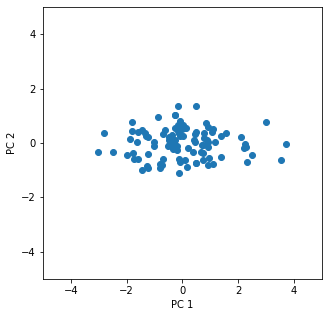

In [12]:
## Solution ##

# Give names to the two PC vectors:
pc1 = PCs[0,:]
pc2 = PCs[1,:]

print('PC vectors have length=1: ', np.linalg.norm(pc1), np.linalg.norm(pc2))
print('PC vectors are orthogonal to one another: ', np.dot(pc1, pc2))

# As above, project the data onto the principal component axes:
proj = x_meansub @ PCs.T

# Plot the data projected along the first two PCs:
plt.figure(figsize=(5,5))
plt.plot(proj[:,0], proj[:,1], 'o')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.xlim(-5,5)
plt.ylim(-5,5)

## PCA on the Iris dataset

Let's load the iris dataset, in which each datapoint corresponds to four values measured for a particular flower, and the labels of datapoints correspond to the flowers' subspecies identities.

In [13]:
# Load the data:
from sklearn.datasets import load_iris
data = load_iris()  # data is a dictionary containing lots of things

# List of the features and targets being measured:
print('Features: \n', data['feature_names'])
print('Targets: \n', data['target_names'])

# The input data (each row gives measurements of the features listed above):
X_iris = data['data']
n_samples, n_features = np.shape(data['data'])
print('n_samples, n_features: ', (n_samples, n_features))

# The target data (subspecies identity):
y = data['target']

# Print the first few samples of x and y data:
print('X data: \n', X_iris[:3,:])
print('y data: \n', y[:3])


Features: 
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Targets: 
 ['setosa' 'versicolor' 'virginica']
n_samples, n_features:  (150, 4)
X data: 
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]
y data: 
 [0 0 0]


**Exercise**: Perform PCA on the iris data and plot the data projected onto the first two principal components. Report the fraction of variance explained by each principal component.

Fraction of variance explained by each PC:  [0.92461872 0.05306648 0.01710261 0.00521218]


Text(0, 0.5, 'PC 2')

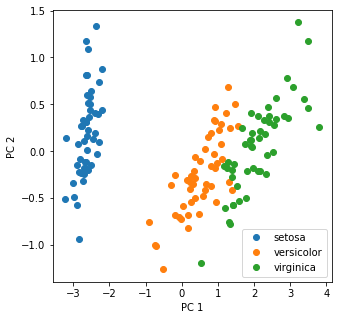

In [14]:
## Solution ##

# Perform PCA on the data:
pca = PCA()
pca.fit(X_iris)
PCs = pca.components_  # each row is one of the PC vectors

print('Fraction of variance explained by each PC: ', pca.explained_variance_ratio_)

# Subtract the mean from the data:
X_iris_mean = np.mean(X_iris, axis=0)
X_iris_meansub = X_iris - X_iris_mean

# As above, project the data onto the principal component axes:
proj = X_iris_meansub @ PCs.T

# Plot the data:
plt.figure(figsize=(5,5))
for label in [0,1,2]:
    plt.plot(proj[y==label,0], proj[y==label,1], 'o')
plt.legend(data['target_names'])
plt.xlabel('PC 1')
plt.ylabel('PC 2')

# Nonlinear dimensionality reduction

## t-SNE

T-SNE (T-distributed Stochastic Neighbor Embedding) models each high-dimensional object by a two-dimensional point in such a way that similar objects are modeled by nearby points and dissimilar objects are modeled by distant points with high probability.

T-SNE steps: 
1. First, t-SNE constructs a probability distribution over pairs of high-dimensional objects in such a way that similar objects are assigned a higher probability while dissimilar points are assigned a lower probability. 
2. Second, t-SNE defines a similar probability distribution over the points in the low-dimensional map, and it minimizes the Kullback–Leibler divergence (KL divergence) between the two distributions with respect to the locations of the points in the map. 

T-SNE tends to be useful for identifying cluster structure in data. 

Below we'll apply t-SNE to the Iris dataset.

(150, 2)


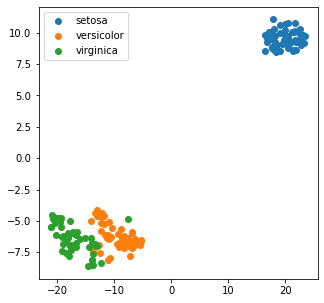

In [15]:
from sklearn.manifold import TSNE

X_tsne = TSNE(n_components=2).fit_transform(X_iris)
print(X_tsne.shape)

# Plot the data:
plt.figure(figsize=(5,5))
for label in [0,1,2]:
    plt.plot(X_tsne[y==label,0], X_tsne[y==label,1], 'o')
plt.legend(data['target_names'])


## Locally linear embedding

LLE is a nonlinear dimensionality reduction algorithm that seeks to preserve distances within local neighborhoods. It can be thought of as a series of local Principal Component Analyses which are globally compared to find the best non-linear embedding. 

LLE steps:
1. Find a set of the nearest neighbors of each point.
2. Compute a set of weights for each point that best describes the point as a linear combination of its neighbors.
3. Use an eigenvector-based optimization technique to find the low-dimensional embedding of points, such that each point is still described with the same linear combination of its neighbors.

This method tends to be useful for identifying low-dimensional curvy manifolds in high-dimensional data.

The following example is from here:
https://scikit-learn.org/stable/auto_examples/manifold/plot_swissroll.html#sphx-glr-auto-examples-manifold-plot-swissroll-py

In [ ]:
# This import is needed to modify the way figure behaves
from mpl_toolkits.mplot3d import Axes3D

Axes3D

# ----------------------------------------------------------------------
# Locally linear embedding of the swiss roll

from sklearn import manifold, datasets

X, color = datasets.make_swiss_roll(n_samples=1500)

print("Computing LLE embedding")
X_r, err = manifold.locally_linear_embedding(X, n_neighbors=12, n_components=2)
print("Done. Reconstruction error: %g" % err)

# ----------------------------------------------------------------------
# Plot result

fig = plt.figure(figsize=(6,6))

ax = fig.add_subplot(211, projection="3d")
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.set_title("Original data")

ax = fig.add_subplot(212)
ax.scatter(X_r[:, 0], X_r[:, 1], c=color, cmap=plt.cm.Spectral)
plt.axis("tight")
plt.xticks([]), plt.yticks([])
plt.title("Projected data")
plt.tight_layout()
plt.show()

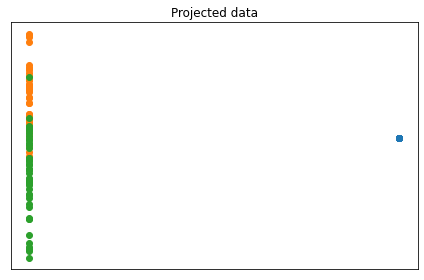

In [22]:
# Plot the Iris data with LLE:

X_r, err = manifold.locally_linear_embedding(X_iris, n_neighbors=12, n_components=2)

for label in [0,1,2]:
    plt.plot(X_r[y==label,0], X_r[y==label,1], 'o')
plt.axis("tight")
plt.xticks([]), plt.yticks([])
plt.title("Projected data")
plt.tight_layout()
plt.show()

From Wikipedia: "LLE tends to handle non-uniform sample densities poorly because there is no fixed unit to prevent the weights from drifting as various regions differ in sample densities."